#### Data: https://public.tableau.com/s/sites/default/files/media/Resources/Global%20Sport%20Finances.xlsx

In [1]:
# as usual export pandas
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

In [2]:
# read the xls file with the sheetname
sheets = pd.ExcelFile('Global Sport Finances.xlsx')
sheets.sheet_names

[u'Top teams Payroll List', u'Top Athlete Salaries']

In [3]:
df = pd.read_excel('Global Sport Finances.xlsx', sheet='Top teams Payroll List')
df.head(3)

,Rank,Last Year's Rank,"Team, League",Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years
0,1,1,"Manchester City, EPL",8109912,0.6,202747812,3,31660772.0,265.0
1,2,5,"New York Yankees, MLB",8031948,12.3,208830659,2,35789052.0,5.0
2,3,2,"Los Angeles Dodgers, MLB",7778336,4.1,241128402,1,26226200.0,79.0


In [4]:
df = pd.read_excel('Global Sport Finances.xlsx', sheet='Top Athlete Salaries')
df.head(3)

,Rank,Last Year's Rank,"Team, League",Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years
0,1,1,"Manchester City, EPL",8109912,0.6,202747812,3,31660772.0,265.0
1,2,5,"New York Yankees, MLB",8031948,12.3,208830659,2,35789052.0,5.0
2,3,2,"Los Angeles Dodgers, MLB",7778336,4.1,241128402,1,26226200.0,79.0


#### Both sheets have the same team wise data, so let's the first one

In [5]:
df = pd.read_excel('Global Sport Finances.xlsx', sheet='Top teams Payroll List')
df.head(3)

,Rank,Last Year's Rank,"Team, League",Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years
0,1,1,"Manchester City, EPL",8109912,0.6,202747812,3,31660772.0,265.0
1,2,5,"New York Yankees, MLB",8031948,12.3,208830659,2,35789052.0,5.0
2,3,2,"Los Angeles Dodgers, MLB",7778336,4.1,241128402,1,26226200.0,79.0


#### split team and leagues, identify each sports related to leagues

In [6]:
sports_type = {
    'IPL': 'Cricket',
    'MLB': 'Baseball',
    'NPB': 'Baseball',
    'NBA': 'Basketball',
    'EPL': 'Football',
    'La Liga': 'Football',
    'Bundesliga': 'Football',
    'Serie A': 'Football',
    'NFL': 'Football',
    'AFL': 'Football',
    'SPL': 'Football',
    'CFL': 'Football',
    'CSL': 'Football',
    'NHL': 'Hockey',
    'MLS': 'Soccer'
}

#### split team, league and strip the whitespaces

In [7]:
df['Team'] = df['Team, League'].str.split(',').str[0]
df['Team'] = df['Team'].str.strip()

df['League'] = df['Team, League'].str.split(',').str[1]
df['League'] = df['League'].str.strip()
df['League'].unique()

array([u'EPL', u'MLB', u'La Liga', u'NBA', u'Bundesliga', u'Serie A',
       u'IPL', u'NHL', u'NFL', u'SPL', u'CSL', u'NPB', u'MLS', u'AFL',
       u'CFL'], dtype=object)

#### get each sports asscoiated with the league name

In [8]:
df['sports'] = df['League'].apply(lambda v: sports_type.get(v, 'NA'))
df['sports'].unique()

array(['Football', 'Baseball', 'Basketball', 'Cricket', 'Hockey',
       'Soccer'], dtype=object)

#### check if sports column doesn't have an entry

In [9]:
df[df['sports'] == 'NA']

,Rank,Last Year's Rank,"Team, League",Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years,Team,League,sports


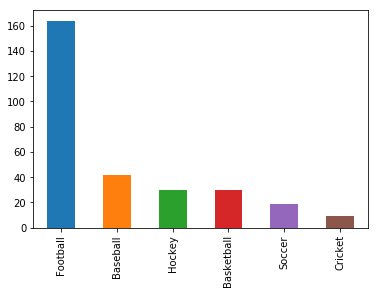

In [10]:
df['sports'].value_counts().plot.bar()

#### max, min % change in 5 years across all sports
#### have attached the images as there is some styling not working

In [11]:
chng_clm = '% change over last 5 years'

def get_minmax_perc(indic, df_src):
    df_chng = pd.DataFrame(columns=['Team', 'League', 'Sports', '% Change'])
    for sports in df_src['sports'].unique():
        df_sports = df_src[df_src['sports'] == sports]
        df_sports = df_sports[~df_sports[chng_clm].isnull()]
        if len(df_sports):
            if indic == 'max':
                indic_idx = df_sports[chng_clm].idxmax()
            elif indic == 'min':
                indic_idx = df_sports[chng_clm].idxmin()
            row_ix = df_sports.loc[indic_idx]
            
            df_chng.loc[len(df_chng)] = [row_ix['Team'], row_ix['League'], row_ix['sports'], row_ix[chng_clm]]
    return df_chng

In [12]:
max_df = get_minmax_perc('max', df)
max_df = max_df.sort_values('% Change', ascending=False)
max_df.style.bar(subset=['% Change'], align='mid', color=['#d65f5f', '#5fba7d'])

,Team,League,Sports,% Change
0,Napoli,Serie A,Football,363
1,Pittsburgh Pirates,MLB,Baseball,265
5,Toronto FC,MLS,Soccer,218
2,Brooklyn Nets,NBA,Basketball,65
4,LA Kings,NHL,Hockey,42
3,Mumbai Indians,IPL,Cricket,26


![% Change](max_perc.PNG "% change over last 5 years")

In [13]:
min_df = get_minmax_perc('min', df)
min_df = min_df.sort_values('% Change', ascending=True)
min_df.style.bar(subset=['% Change'], align='mid', color=['#d65f5f', '#5fba7d'])

,Team,League,Sports,% Change
1,Hanshin Tigers,NPB,Baseball,-61
0,Oakland Raiders,NFL,Football,-54
2,Philadelphia 76ers,NBA,Basketball,-38
3,Kings XI Punjab,IPL,Cricket,-36
5,Chicago Fire,MLS,Soccer,-27
4,Calgary Flames,NHL,Hockey,-18


![% Change](min_perc.PNG "% change over last 5 years")

#### visualize the table by column [Rank of Total Payroll] with % change from last year's survey will help to compare across both the columns

In [14]:
metric_columns = ["% change from last year's survey"]
select_columns = ['Team', 'League', 'sports', 'Rank of Total Payroll'] + metric_columns

df_payroll = df.sort_values(['Rank of Total Payroll'], ascending=True).head(20)
df_payroll[select_columns].style.bar(subset=metric_columns, align='mid', color=['#d65f5f', '#5fba7d'])

,Team,League,sports,Rank of Total Payroll,% change from last year's survey
2,Los Angeles Dodgers,MLB,Baseball,1,4.1
1,New York Yankees,MLB,Baseball,2,12.3
0,Manchester City,EPL,Football,3,0.6
4,Barcelona,La Liga,Football,4,2.4
3,Real Madrid,La Liga,Football,5,3.7
13,Philadelphia Phillies,MLB,Baseball,6,-5.5
6,Bayern Munich,Bundesliga,Football,7,8.7
7,Manchester United,EPL,Football,8,8.9
12,Detroit Tigers,MLB,Baseball,9,2
26,Milan,Serie A,Football,10,-26


![% Change](rank_with_change.PNG "rank_with_change")

#### get all teams whose rank has gone down the current year

In [15]:
df_rank = df.copy()
df_rank["Last Year's Rank"] = df_rank["Last Year's Rank"].replace(")", "999")
df_rank["Last Year's Rank"] = df_rank["Last Year's Rank"].astype('int')
df_rank_fallen = df_rank[df_rank['Rank'] > df_rank["Last Year's Rank"]].copy()

necess_clms = ['Rank', "Last Year's Rank", 'rank_diff', 'Team', 'League', 'sports']
df_rank_fallen['rank_diff'] = df_rank_fallen["Last Year's Rank"] - df_rank_fallen['Rank'] 
df_rank_fallen[necess_clms].sort_values('rank_diff').head(20)

,Rank,Last Year's Rank,rank_diff,Team,League,sports
169,170,94,-76,Rajasthan Royals,IPL,Cricket
143,144,74,-70,Calgary Flames,NHL,Hockey
174,175,120,-55,Jacksonville Jaguars,NFL,Football
79,80,27,-53,Philadelphia 76ers,NBA,Basketball
158,159,108,-51,New York Jets,NFL,Football
209,210,166,-44,Valladolid,La Liga,Football
149,150,109,-41,Detroit Lions,NFL,Football
102,103,63,-40,Kings XI Punjab,IPL,Cricket
153,154,114,-40,Atlanta Falcons,NFL,Football
210,211,172,-39,Zaragoza,La Liga,Football


#### get all the teams whose rank has gone up

In [16]:
df_rank_grown = df_rank[df_rank['Rank'] < df_rank["Last Year's Rank"]].copy()

# not considering first time ranks for the current year
df_rank_grown = df_rank_grown[df_rank_grown["Last Year's Rank"] < 999]

df_rank_grown['rank_diff'] =  (df_rank_grown['Rank'] - df_rank_grown["Last Year's Rank"]) * -1

df_rank_grown[necess_clms].sort_values('rank_diff', ascending=False).head(20)

,Rank,Last Year's Rank,rank_diff,Team,League,sports
89,90,155,65,Napoli,Serie A,Football
90,91,147,56,Atletico Madrid,La Liga,Football
76,77,129,52,San Diego Padres,MLB,Baseball
82,83,133,50,Tampa Bay Rays,MLB,Baseball
115,116,162,46,Seattle Seahawks,NFL,Football
99,100,139,39,Oakland Athletics,MLB,Baseball
114,115,153,38,Minnesota Vikings,NFL,Football
213,214,252,38,Toronto FC,MLS,Soccer
83,84,121,37,Nashville Predators,NHL,Hockey
127,128,164,36,Hamburg,Bundesliga,Football
